# Video: Exploring Outlier Impact

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

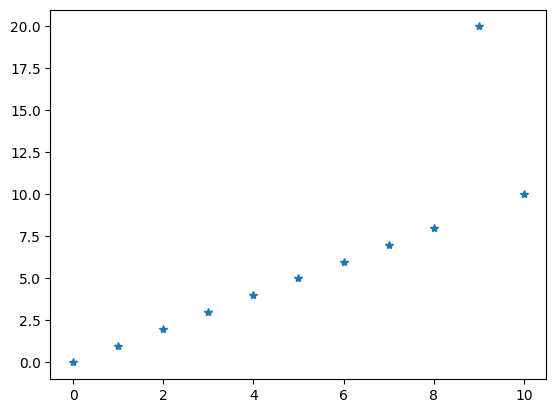

In [ ]:
#@title ##### Slide: Exploring Outlier Impact

_ = plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 20, 10], "*")

Script:
* Now that we can regress linear models, let's try a few examples and see how linear regression handles non-linear data, and mostly linear data with some outliers.
Before each chart is plotted, think about what was changed in the data, and try to guess where the regression line will move, and how far.

Script:
* To help explore outlier impacts on linear regression, I wrote a function to take in a sample of Y values, compute the linear regression, and plot both the regression line and the sample points.
* All the sample data we use will have a small range of X values, and a small range of Y values.


In [ ]:
def plot_regression(Y):
    plt.plot(Y, "*", label="raw")

    X = np.asarray(range(len(Y))).reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, Y)
    print(f"f(X) = {model.coef_[0]} X + {model.intercept_}")


    plt.plot(model.predict(X), label="regression")
    plt.plot([0, len(Y)-1], [0, len(Y)-1], label="y=x")
    plt.legend()

Script:
* Every example will be quote low leverage unquote.
* I won't be playing games with very large numbers to yank hard on the loss function that way.
* But from these examples, you will be able to imagine moving the regression line farther using big numbers for X or Y.

Script:
* Here's the first example with everything on the line y=x.

f(X) = 1.0 X + 0.0


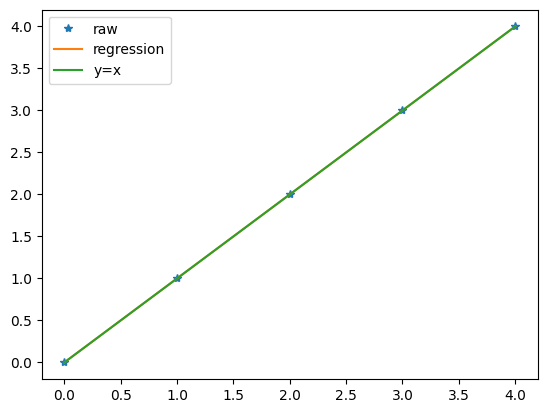

In [ ]:
plot_regression([0, 1, 2, 3, 4])

Script:
* Now, let's move the middle point up by 4. How will the line change?

f(X) = 1.0 X + 0.7999999999999998


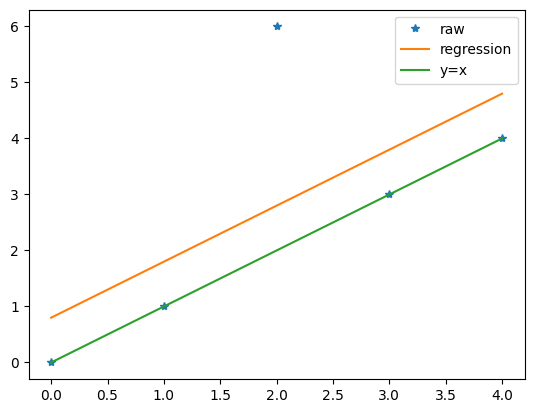

In [ ]:
plot_regression([0, 1, 6, 3, 4])

Script:
* So moving the middle point up by four pulled up the line, but did not change the slope.
* Just the additive constant changed.
* So if y=x really is the truth and just that point was corrupted somehow, when we look farther out to very high or very high values of X, then they will be off by that constant change.
* But since the slope did not change, it will only be off by that constant change.

Script:
* If we change the first data point, how does it look?

f(X) = 0.19999999999999987 X + 2.4


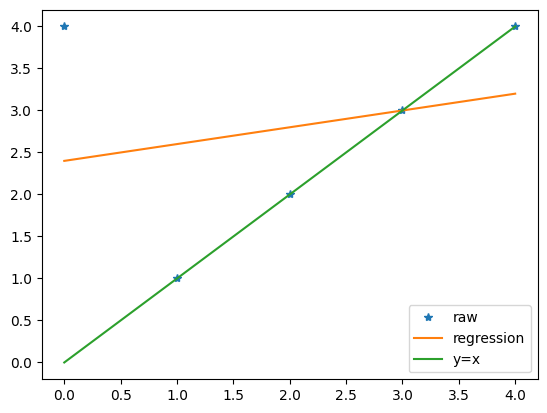

In [ ]:
plot_regression([4, 1, 2, 3, 4])

Script:
* So in this case, both the slope and constant changed.
* It looks like the left side of the line was pulled up to get closer to that data point at $x=0$.
* Because linear regression uses the quadratic loss function, bigger errors for that sample have outsized impact on the loss function.
* In this case, it worked out that reducing the residual at $x=0$ reduced the loss function enough to compensate for the residuals growing at all the other data points.

Script:
* If we change the rightmost data point, we should see a similar change, but in the other direction.

f(X) = 1.8 X + -0.8000000000000003


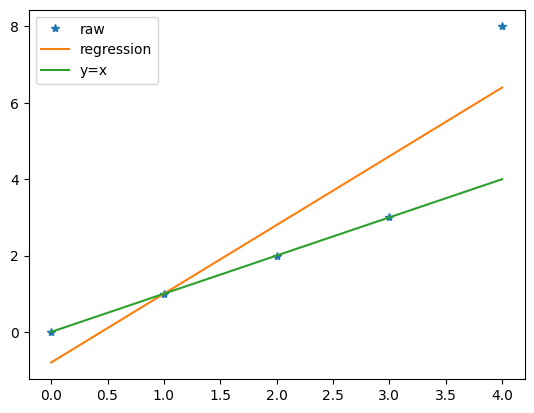

In [ ]:
plot_regression([0, 1, 2, 3, 8])

Script:
* If we change one of the middle points but not the exact middle, then the line will move again, but not so much because the end data points would then have big residuals.

f(X) = 0.8 X + 0.7999999999999998


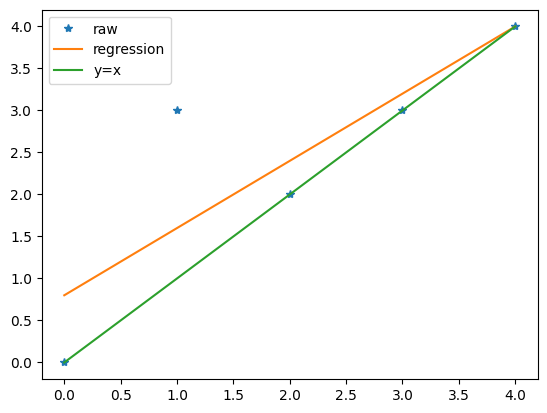

In [ ]:
plot_regression([0, 3, 2, 3, 4])

Script:
* One last example, I will add more data points.
* Still on the y=x line, except for one point in the middle changed by 4 like the previous examples.
* This time, the change will almost be in the middle, but not exactly in the middle, so it won't be perfectly balanced like the first distorted example.

f(X) = 1.0030075187969927 X + 0.17142857142856904


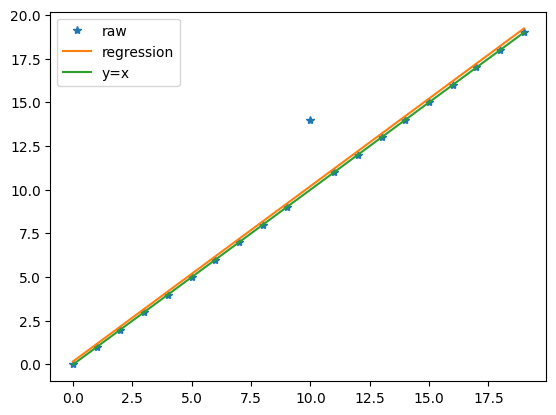

In [ ]:
plot_regression([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Script:
* So in this case, the slope is changed, but only a little bit.
* There is a modest additive constant, so there are small errors all along this range.
* Since the slope is off, if we go out to plus or minus a million, we'll get big errors.
* But those errors will take a while to grow big.
* Within our sample range, the error is pretty modest.

Script:
* Is there any way you could improve the regression for that one outlier point without a huge impact on the other data points?
* Pause here and think about this example for a minute.

Script:
* The answer is no.
* If you try to move the regression line closer to that outlier, then you are going to increase the errors for most or all of the other data points.
* If you just change the constant and shift up the line, then you are increasing the residuals of 19 data points while decreasing just one by the same amount.
* And if you change the slope, then at least one side will have huge errors.

## Outliers vs Overall Losses

* Regression balances losses across all data points.
  * Reducing one residual often increases residuals at other points.
  * Loss functions mediate those tradeoffs.

Script:
* Wrapping up, I want you to take away some intuition about how the regression is trying to balance errors across all the training data points.
* That reducing the loss from one data point is usually at the expense of increasing the loss at other data points.
* Loss functions help manage those tradeoffs and determine when those tradeoffs should be taken.
* Outliers on the edges tend to have more leverage to change the regression line than outliers in the middle, because adjusting the regression on the edges tends to change the middle less.
